In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

In [2]:
lstm = pd.read_csv('FinalBC.csv')

In [3]:
lstm.sample()

,Date,provincename,Construction,Transportation,Agriculture,Population,Station Name,Max Temp (°C),Total Snow (cm),Total Precip (mm),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Longitude (x),Latitude (y)
4342,01-11-2005,British Columbia,15.259395,5.809052,12.03576,7709,Trail,9.5,0.262804,0.8,2.8,6.3,11.7,0.0,-117.74,49.11


#  Breton Construction

In [4]:
lstm_construction_burnslake = lstm['Construction'][lstm['Station Name'] == 'Burns Lake']

In [5]:
lstm_construction_burnslake.index = pd.to_datetime(lstm_construction_burnslake.index)

In [6]:
lstm_construction_burnslake = lstm_construction_burnslake.to_frame(name='construction')

In [7]:
# Scaling the Data
scaler = MinMaxScaler()
lstm_construction_burnslake['construction'] = scaler.fit_transform(lstm_construction_burnslake[['construction']])


In [8]:
lstm_construction_burnslake['construction'].head()

1970-01-01 00:00:00.000000000    0.000000
1970-01-01 00:00:00.000000001    0.004721
1970-01-01 00:00:00.000000002    0.038566
1970-01-01 00:00:00.000000003    0.005203
1970-01-01 00:00:00.000000004    0.039320
Name: construction, dtype: float64

In [9]:

def create_sequences(data, sequence_length):
    sequences, labels = [], []
    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length]
        label = data[i + sequence_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)


In [10]:
sequence_length = 11
X, y = create_sequences(lstm_construction_burnslake['construction'].values, sequence_length)


In [11]:
# Spliting the Data 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [12]:
n_steps =11
n_features =1

In [13]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

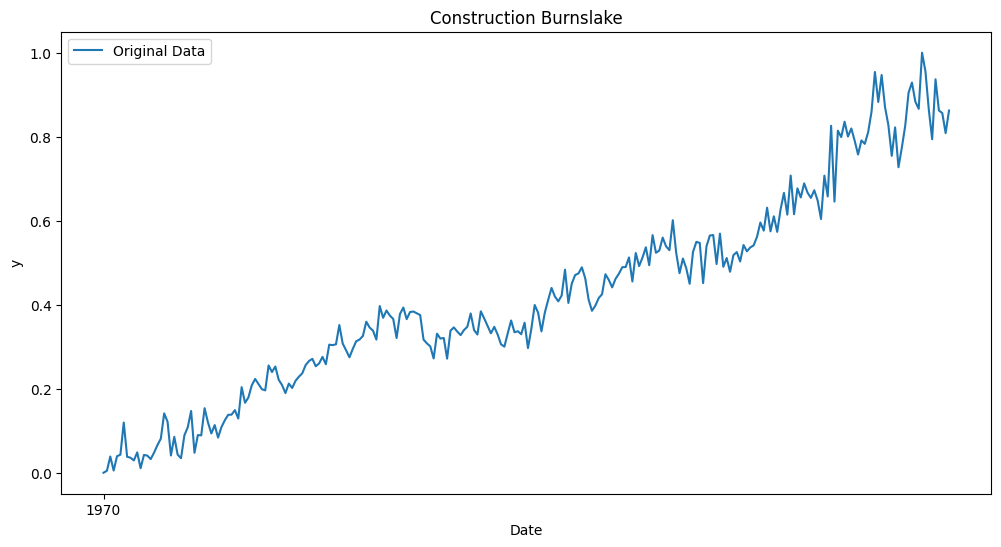

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(lstm_construction_burnslake.index, lstm_construction_burnslake['construction'], label='Original Data')
plt.title('Construction Burnslake')
plt.xlabel('Date')
plt.ylabel('y')
plt.legend()
plt.show()

In [15]:
#Scaling the data
scaler = MinMaxScaler()
lstm_construction_burnslake[['construction']] = scaler.fit_transform(lstm_construction_burnslake[['construction']])
#Split the data - we split the data in 80-20 which means 80 is for training and 20 is for testing
train_size = int(len(lstm_construction_burnslake) * 0.8)
train, test = lstm_construction_burnslake[:train_size], lstm_construction_burnslake[train_size:]

def create_sequences(data, sequence_length):
    sequences, labels = [], []
    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length]
        label = data[i + sequence_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

sequence_length = 8  # Adjust based on your data

X_train, y_train = create_sequences(train['construction'].values, sequence_length)
X_test, y_test = create_sequences(test['construction'].values, sequence_length)

# Reshape input for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# LSTM model creation
def create_lstm_model(optimizer='adam'):
    model = Sequential()
    model.add(LSTM(50, input_shape=(X_train.shape[1], 1)))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model


2/2 [==============================] - 0s 7ms/step


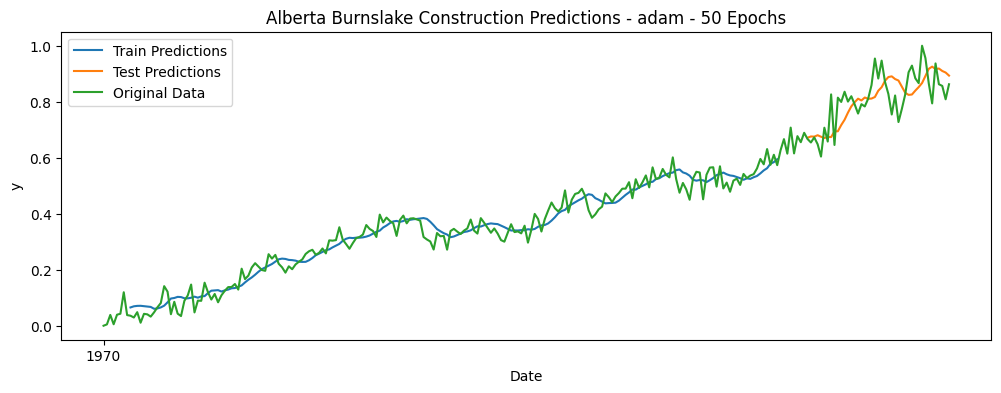

Metrics for adam - 50 Epochs:
Train MSE: 0.04639090140621189
Test MSE: 0.015971277316356985
Train MAE: 0.02712329520488377
Test MAE: 0.0597126275403996
Train RMSE: 0.033938883901822814
Test RMSE: 0.07404079343353484
2/2 [==============================] - 0s 7ms/step


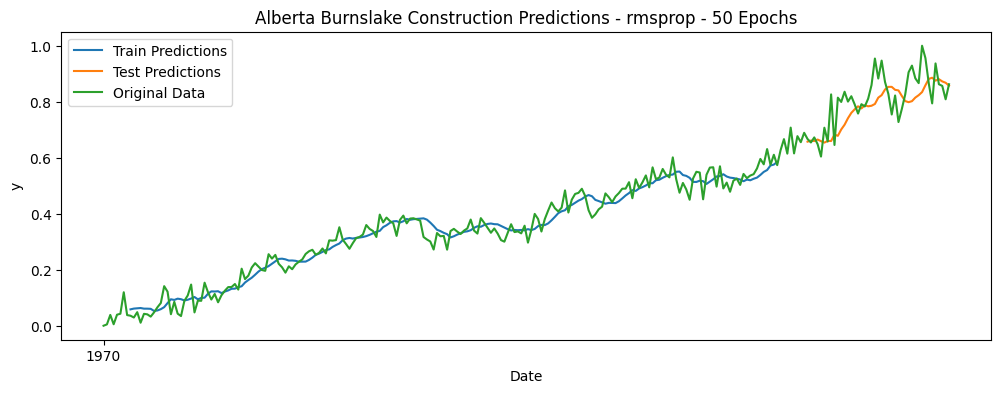

Metrics for rmsprop - 50 Epochs:
Train MSE: 0.046277672180805016
Test MSE: 0.0155105714936205
Train MAE: 0.02665296450702166
Test MAE: 0.05999150911152987
Train RMSE: 0.033336423241081777
Test RMSE: 0.07668663335325905
2/2 [==============================] - 0s 0s/step


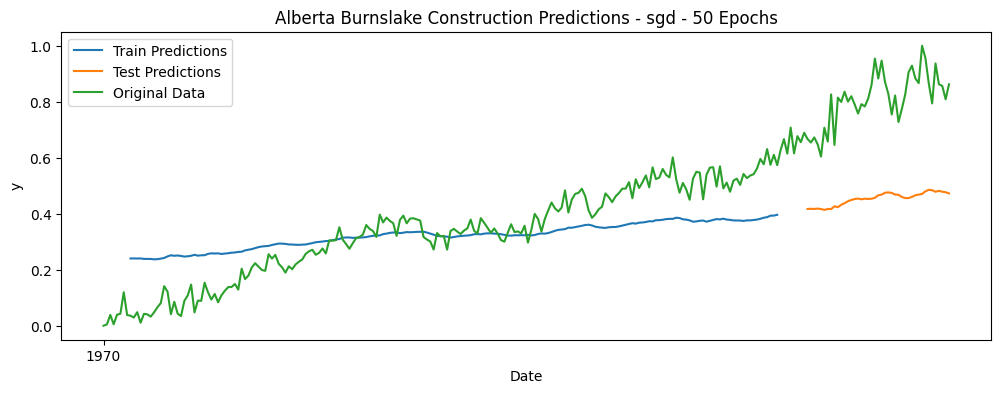

Metrics for sgd - 50 Epochs:
Train MSE: 0.026222113425716936
Test MSE: 0.13697759795026007
Train MAE: 0.09271305893954972
Test MAE: 0.3573427570243904
Train RMSE: 0.11328230505869277
Test RMSE: 0.3661243464626577
2/2 [==============================] - 0s 16ms/step


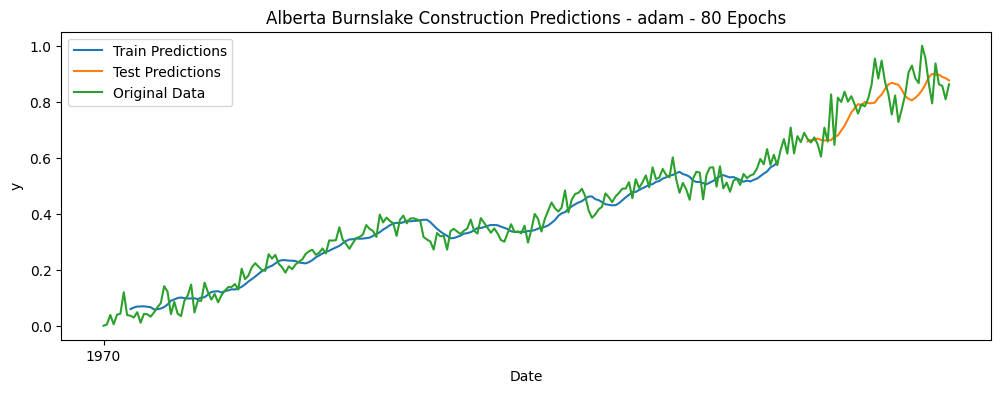

Metrics for adam - 80 Epochs:
Train MSE: 0.045956295833270225
Test MSE: 0.015851871571815297
Train MAE: 0.028727919521309483
Test MAE: 0.061713587271153614
Train RMSE: 0.03510298500981529
Test RMSE: 0.07773489853422309
2/2 [==============================] - 0s 12ms/step


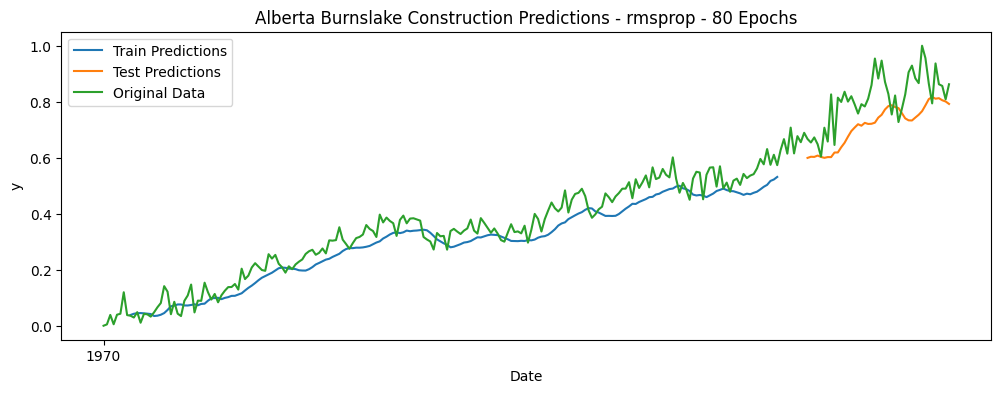

Metrics for rmsprop - 80 Epochs:
Train MSE: 0.04501951530506015
Test MSE: 0.022923914155959905
Train MAE: 0.04505816204270061
Test MAE: 0.09891588236647013
Train RMSE: 0.05307629626621332
Test RMSE: 0.11810048359623036
2/2 [==============================] - 0s 17ms/step


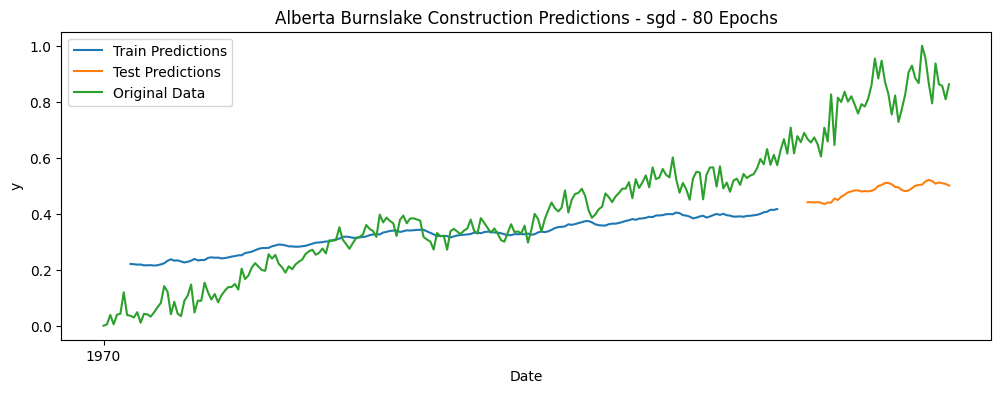

Metrics for sgd - 80 Epochs:
Train MSE: 0.02730921675254241
Test MSE: 0.11736420489887067
Train MAE: 0.08320445514736145
Test MAE: 0.32852102183637194
Train RMSE: 0.10188843846574262
Test RMSE: 0.3375149637494935
2/2 [==============================] - 0s 16ms/step


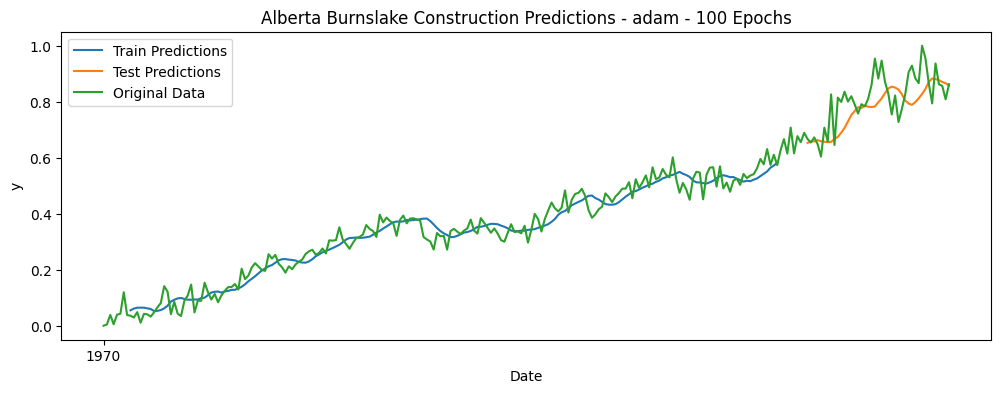

Metrics for adam - 100 Epochs:
Train MSE: 0.046243987037673684
Test MSE: 0.015877919279019544
Train MAE: 0.028154323184524932
Test MAE: 0.06317013530234669
Train RMSE: 0.034742605859798235
Test RMSE: 0.08134964104890706
2/2 [==============================] - 0s 16ms/step


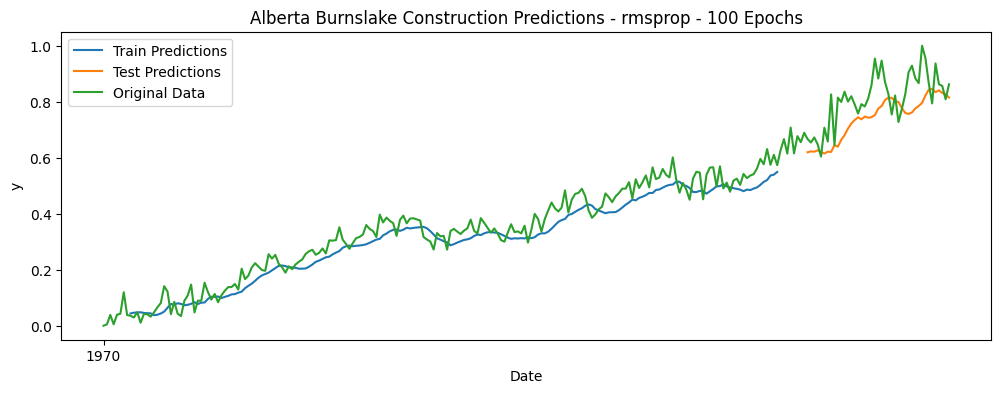

Metrics for rmsprop - 100 Epochs:
Train MSE: 0.045324485643728735
Test MSE: 0.019290062352055135
Train MAE: 0.03813665707885333
Test MAE: 0.07922193501453403
Train RMSE: 0.04518169013846941
Test RMSE: 0.09855083021958484
2/2 [==============================] - 0s 7ms/step


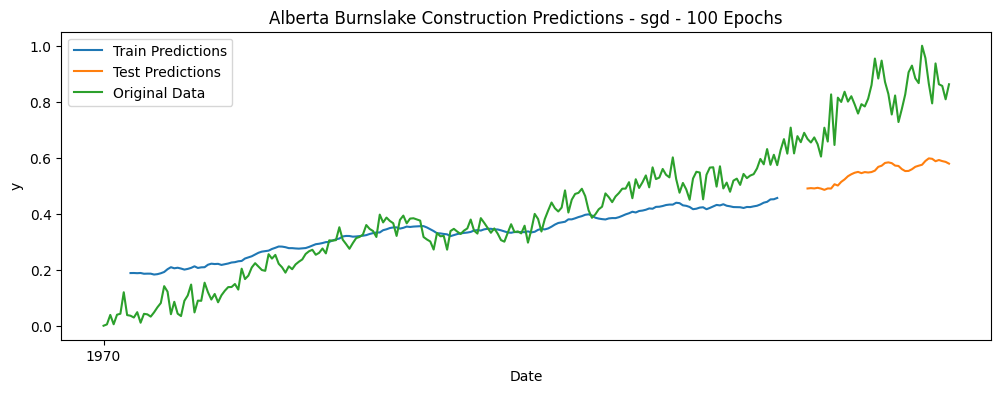

Metrics for sgd - 100 Epochs:
Train MSE: 0.029845775854197003
Test MSE: 0.07913331481722913
Train MAE: 0.06671354939686362
Test MAE: 0.2628551481591404
Train RMSE: 0.0823087495858242
Test RMSE: 0.27295140712967064
2/2 [==============================] - 0s 10ms/step


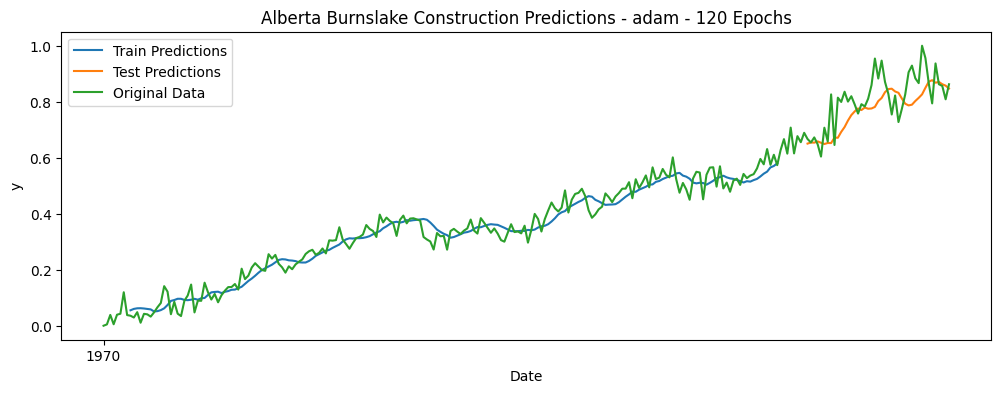

Metrics for adam - 120 Epochs:
Train MSE: 0.04604871861532519
Test MSE: 0.015959670810284897
Train MAE: 0.027671969602352454
Test MAE: 0.06250884009908174
Train RMSE: 0.03416449285760765
Test RMSE: 0.08079231605760237
2/2 [==============================] - 0s 13ms/step


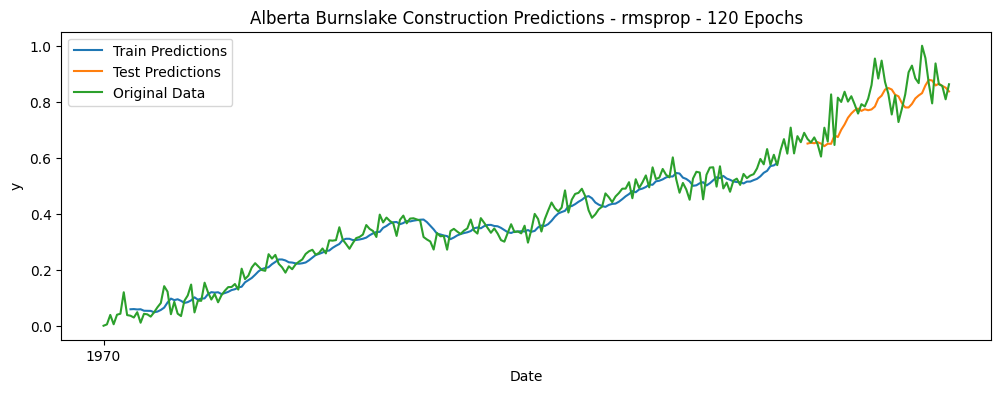

Metrics for rmsprop - 120 Epochs:
Train MSE: 0.04600498781594046
Test MSE: 0.01592220932975423
Train MAE: 0.02674650368155254
Test MAE: 0.06069320083610608
Train RMSE: 0.03318017519564819
Test RMSE: 0.07871697701753211
2/2 [==============================] - 0s 0s/step


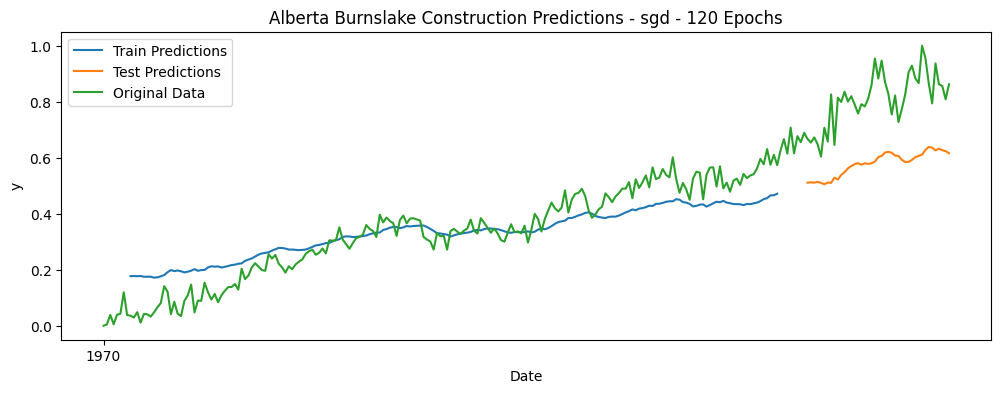

Metrics for sgd - 120 Epochs:
Train MSE: 0.030998347886065224
Test MSE: 0.06424604175357167
Train MAE: 0.06106969572901547
Test MAE: 0.23171406109284487
Train RMSE: 0.07564298078346875
Test RMSE: 0.2424268670684133


In [16]:
#Epoch applying
epochs_list = [50,80, 100, 120]
optimizers_list = ['adam','rmsprop','sgd' ]

#A new model is generated for every combination,
# and it is trained with training data (X_train and y_train) using the fit technique.

for epochs in epochs_list:
    for optimizer in optimizers_list:
        model = create_lstm_model(optimizer=optimizer)
        history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_split=0.1, verbose=0)

# The model is used to predict on both the training and testing sets after it has been trained.
# The scaler is then used to inversely translate the predictions back to the original scale.
# For visual aid purposes, the original data and the forecasts are shown together.

        train_predictions = model.predict(X_train)
        test_predictions = model.predict(X_test)

        plt.figure(figsize=(12, 4))
        plt.plot(lstm_construction_burnslake.index[sequence_length:train_size], scaler.inverse_transform(train_predictions), label='Train Predictions')
        plt.plot(lstm_construction_burnslake.index[train_size + sequence_length:], scaler.inverse_transform(test_predictions), label='Test Predictions')
        plt.plot(lstm_construction_burnslake.index, lstm_construction_burnslake['construction'], label='Original Data')
        plt.title(f'Alberta Burnslake Construction Predictions - {optimizer} - {epochs} Epochs')
        plt.xlabel('Date')
        plt.ylabel('y')
        plt.legend()
        plt.show()

        train_mae = mean_absolute_error(scaler.inverse_transform(train_predictions), train['construction'].values[sequence_length:])
        test_mae = mean_absolute_error(scaler.inverse_transform(test_predictions), test['construction'].values[sequence_length:])
        
        train_rmse = np.sqrt(mean_squared_error(scaler.inverse_transform(train_predictions), train['construction'].values[sequence_length:]))
        test_rmse = np.sqrt(mean_squared_error(scaler.inverse_transform(test_predictions), test['construction'].values[sequence_length:]))
     
        train_mse = np.mean(np.square(scaler.inverse_transform(train_predictions) - train['construction'].values[sequence_length:]))
        test_mse = np.mean(np.square(scaler.inverse_transform(test_predictions) - test['construction'].values[sequence_length:]))
        print(f'Metrics for {optimizer} - {epochs} Epochs:')
        print(f'Train MSE: {train_mse}')
        print(f'Test MSE: {test_mse}')
        print(f'Train MAE: {train_mae}')
        print(f'Test MAE: {test_mae}')
        print(f'Train RMSE: {train_rmse}')
        print(f'Test RMSE: {test_rmse}')

Metrics for rmsprop - 100 Epochs:

Train MSE: 0.13103209430116353

Test MSE: 0.007951870185501949

Train MAE: 0.04127986989904224

Test MAE: 0.03017227202395725

Train RMSE: 0.05754643000112567

Test RMSE: 0.044310642080563845



# Kootenay Transportation

In [17]:
lstm_transportation_kootenay = lstm['Transportation'][lstm['Station Name'] == 'Kootenay']

In [18]:
lstm_transportation_kootenay.index = pd.to_datetime(lstm_transportation_kootenay.index)

In [19]:
lstm_transportation_kootenay = lstm_transportation_kootenay.to_frame(name='Transportation')

In [20]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [21]:
# Scaling the Data
scaler = MinMaxScaler()
lstm_transportation_kootenay['Transportation'] = scaler.fit_transform(lstm_transportation_kootenay[['Transportation']])


In [22]:
lstm_transportation_kootenay['Transportation'].head()


1970-01-01 00:00:00.000001260    0.146150
1970-01-01 00:00:00.000001261    0.112355
1970-01-01 00:00:00.000001262    0.229303
1970-01-01 00:00:00.000001263    0.082480
1970-01-01 00:00:00.000001264    0.050486
Name: Transportation, dtype: float64

In [23]:
def create_sequences(data, sequence_length):
    sequences, labels = [], []
    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length]
        label = data[i + sequence_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)


In [24]:
sequence_length = 11
X, y = create_sequences(lstm_transportation_kootenay['Transportation'].values, sequence_length)


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [26]:
# Spliting the Data 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [27]:
n_steps =11
n_features =1

In [28]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [29]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

Text(0, 0.5, 'y')

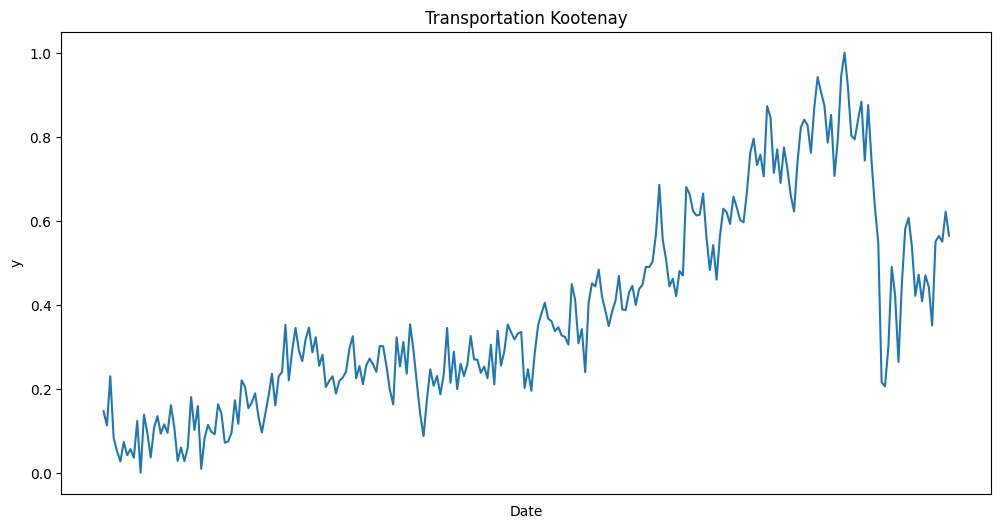

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(lstm_transportation_kootenay.index, lstm_transportation_kootenay['Transportation'], label='Original Data')
plt.title('Transportation Kootenay')
plt.xlabel('Date')
plt.ylabel('y')

In [31]:
#Scaling the data
scaler = MinMaxScaler()
lstm_transportation_kootenay[['Transportation']] = scaler.fit_transform(lstm_transportation_kootenay[['Transportation']])
#Split the data - we split the data in 80-20 which means 80 is for training and 20 is for testing
train_size = int(len(lstm_transportation_kootenay) * 0.8)
train, test = lstm_transportation_kootenay[:train_size], lstm_transportation_kootenay[train_size:]

def create_sequences(data, sequence_length):
    sequences, labels = [], []
    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length]
        label = data[i + sequence_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

sequence_length = 8  # Adjust based on your data

X_train, y_train = create_sequences(train['Transportation'].values, sequence_length)
X_test, y_test = create_sequences(test['Transportation'].values, sequence_length)

# Reshape input for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# LSTM model creation
def create_lstm_model(optimizer='adam'):
    model = Sequential()
    model.add(LSTM(50, input_shape=(X_train.shape[1], 1)))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model


2/2 [==============================] - 0s 0s/step


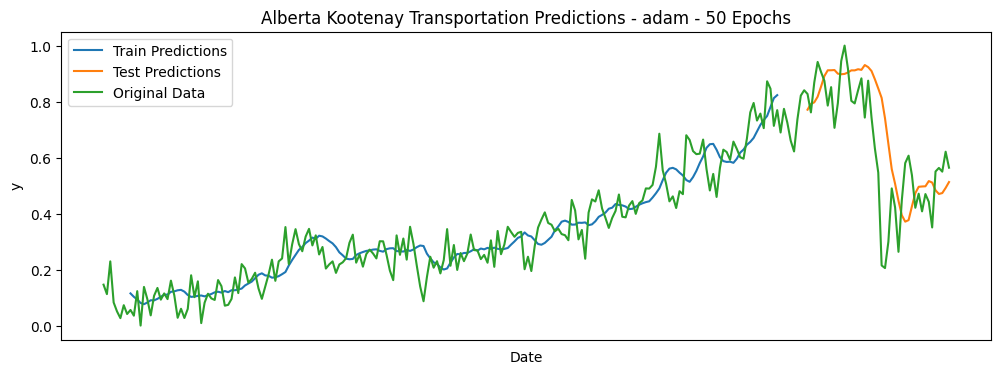

Metrics for adam - 50 Epochs:
Train MSE: 0.06423772503868884
Test MSE: 0.09142150055390495
Train MAE: 0.05231655944739531
Test MAE: 0.12937189096001694
Train RMSE: 0.06615889543185043
Test RMSE: 0.17835804706176078
2/2 [==============================] - 0s 0s/step


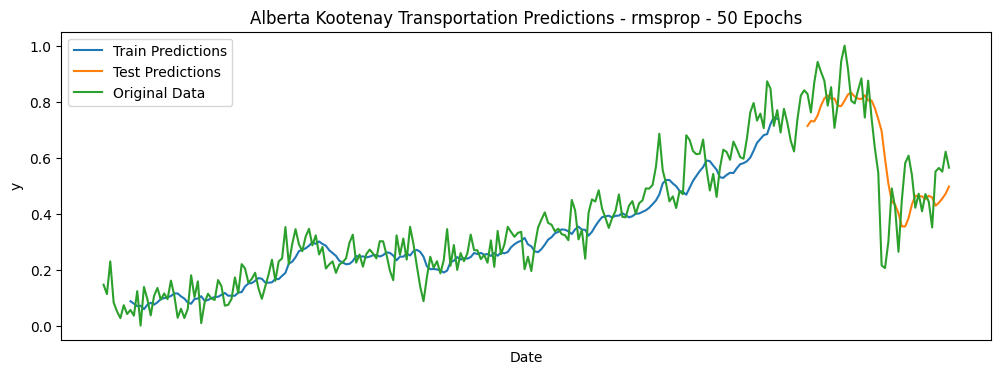

Metrics for rmsprop - 50 Epochs:
Train MSE: 0.0606896187631847
Test MSE: 0.0772721343640119
Train MAE: 0.0526098642528987
Test MAE: 0.1100869932897023
Train RMSE: 0.06805286774443396
Test RMSE: 0.14524532796221074
2/2 [==============================] - 0s 14ms/step


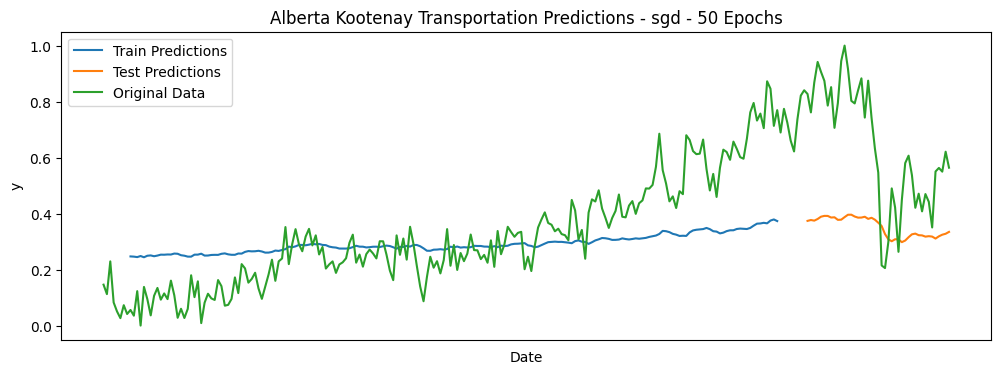

Metrics for sgd - 50 Epochs:
Train MSE: 0.036409888260033864
Test MSE: 0.13057542191018412
Train MAE: 0.12174095886136475
Test MAE: 0.3023301015536905
Train RMSE: 0.15952135818544227
Test RMSE: 0.3443924423263616
2/2 [==============================] - 0s 16ms/step


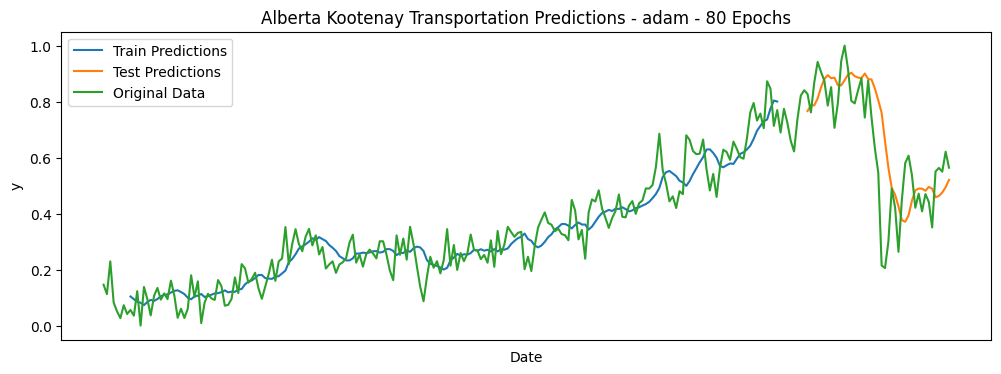

Metrics for adam - 80 Epochs:
Train MSE: 0.0633519382625695
Test MSE: 0.08666971630921495
Train MAE: 0.050380561181565496
Test MAE: 0.11287291844983437
Train RMSE: 0.06373172202870293
Test RMSE: 0.15704312979446702
2/2 [==============================] - 0s 16ms/step


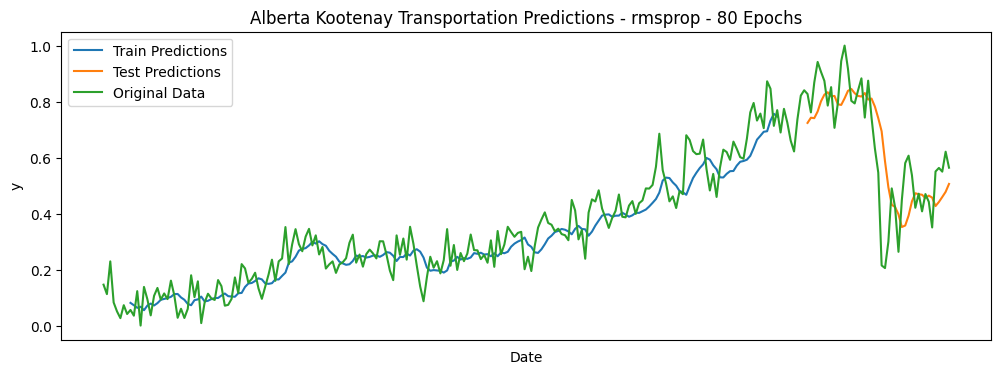

Metrics for rmsprop - 80 Epochs:
Train MSE: 0.061781593303662105
Test MSE: 0.07854133548613969
Train MAE: 0.05176628602276855
Test MAE: 0.10709655202282183
Train RMSE: 0.06683736079912282
Test RMSE: 0.1420765146249888
2/2 [==============================] - 0s 7ms/step


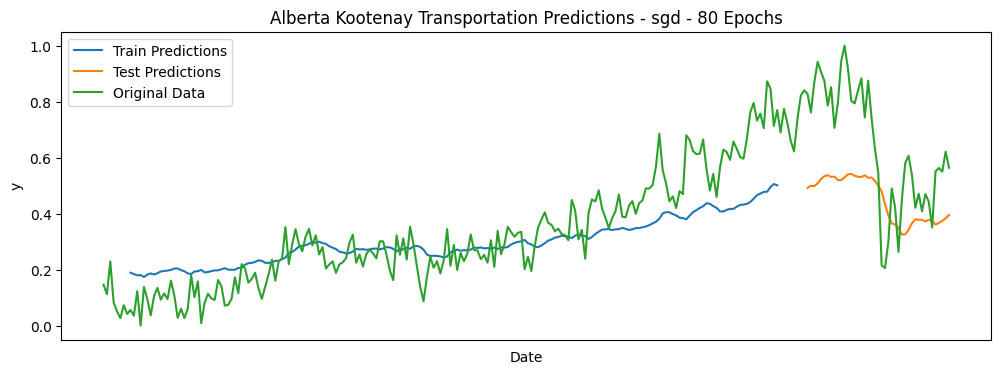

Metrics for sgd - 80 Epochs:
Train MSE: 0.04132081635862342
Test MSE: 0.08846719755027027
Train MAE: 0.08860903228057351
Test MAE: 0.22127700319254354
Train RMSE: 0.11780091280493186
Test RMSE: 0.2512478666092013
2/2 [==============================] - 0s 13ms/step


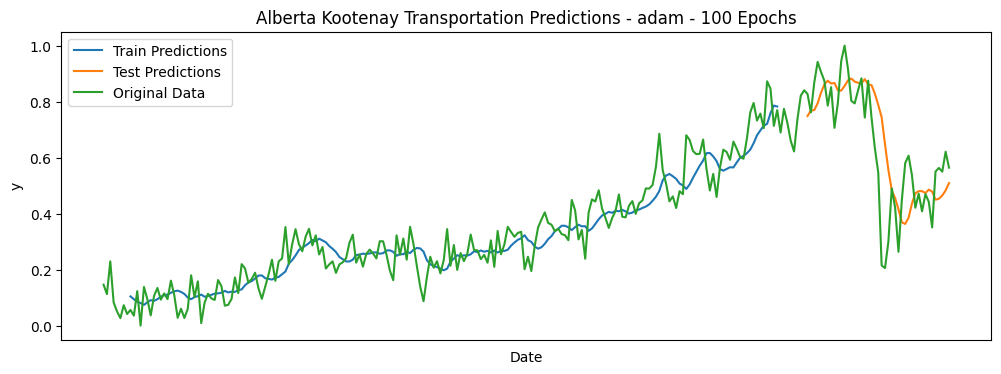

Metrics for adam - 100 Epochs:
Train MSE: 0.062014260197353
Test MSE: 0.08395105122465629
Train MAE: 0.05096894924891984
Test MAE: 0.11077927123177854
Train RMSE: 0.06507246719931259
Test RMSE: 0.15342455409254815
2/2 [==============================] - 0s 18ms/step


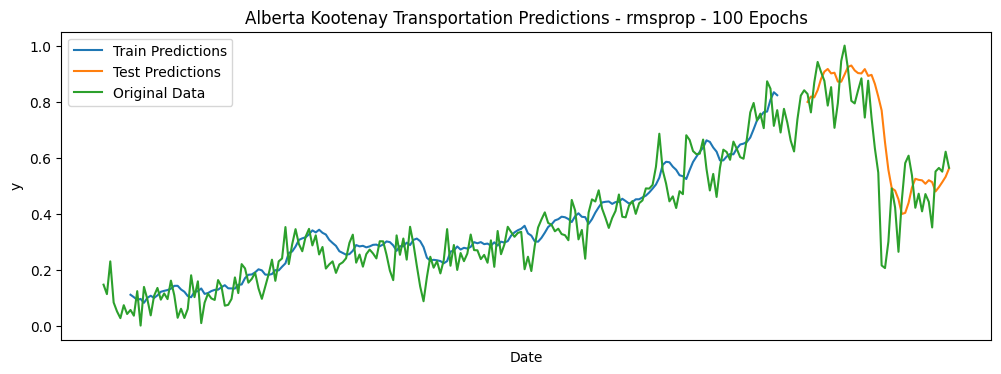

Metrics for rmsprop - 100 Epochs:
Train MSE: 0.06564408105762068
Test MSE: 0.08760019860289095
Train MAE: 0.052030430515723314
Test MAE: 0.11304747012400498
Train RMSE: 0.0654608826387653
Test RMSE: 0.1576984219821015
2/2 [==============================] - 0s 20ms/step


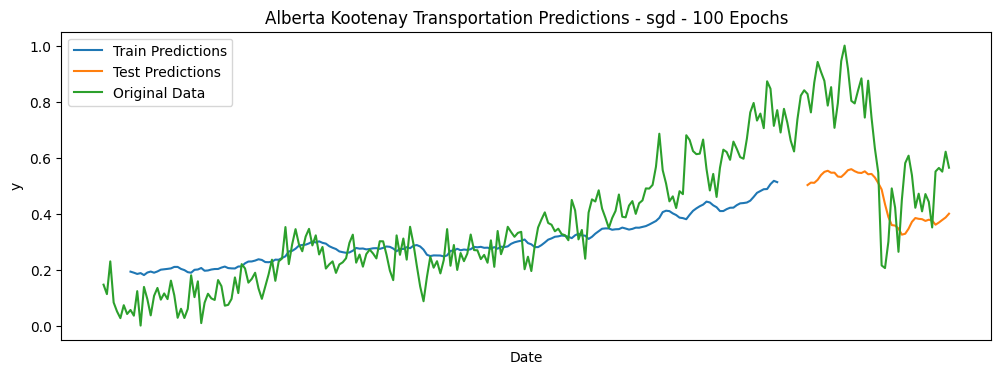

Metrics for sgd - 100 Epochs:
Train MSE: 0.0412089029609168
Test MSE: 0.08671567861742188
Train MAE: 0.08866700988490095
Test MAE: 0.21385065950757082
Train RMSE: 0.11684249998856257
Test RMSE: 0.24288723350981076
2/2 [==============================] - 0s 14ms/step


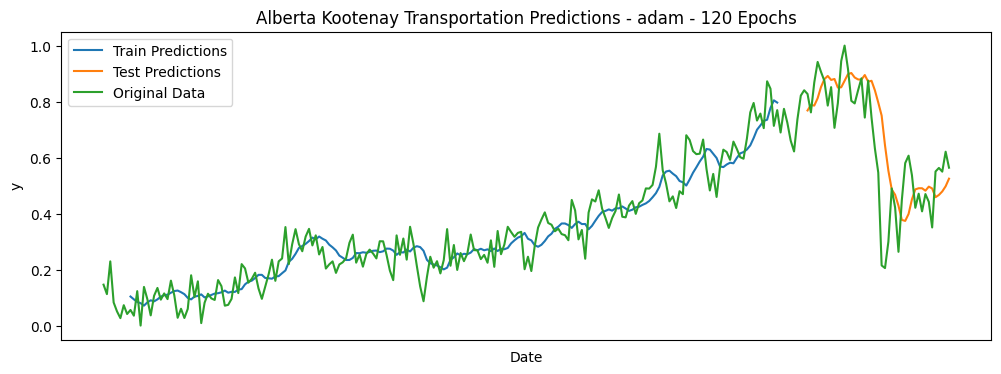

Metrics for adam - 120 Epochs:
Train MSE: 0.06353645486602444
Test MSE: 0.0855406098026115
Train MAE: 0.05004994900234546
Test MAE: 0.11039827962764037
Train RMSE: 0.06330097936498708
Test RMSE: 0.1533663998436553
2/2 [==============================] - 0s 16ms/step


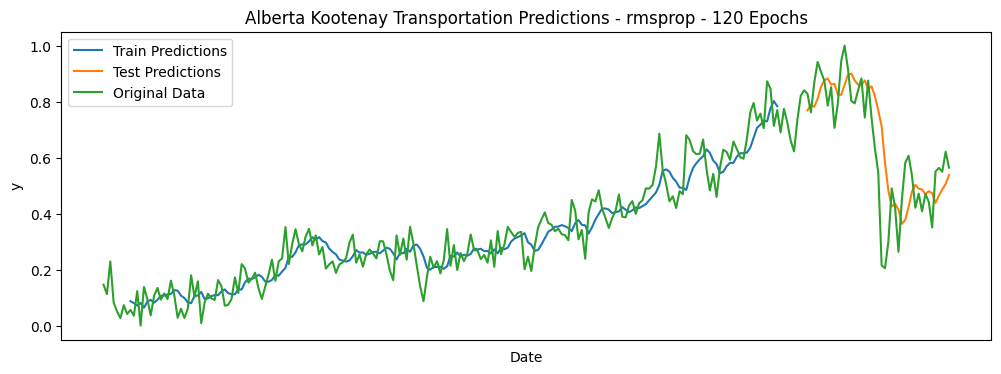

Metrics for rmsprop - 120 Epochs:
Train MSE: 0.06354278619202465
Test MSE: 0.08397788124599354
Train MAE: 0.0483993459799972
Test MAE: 0.1025659557258646
Train RMSE: 0.061551343674138954
Test RMSE: 0.13963061620536887
2/2 [==============================] - 0s 8ms/step


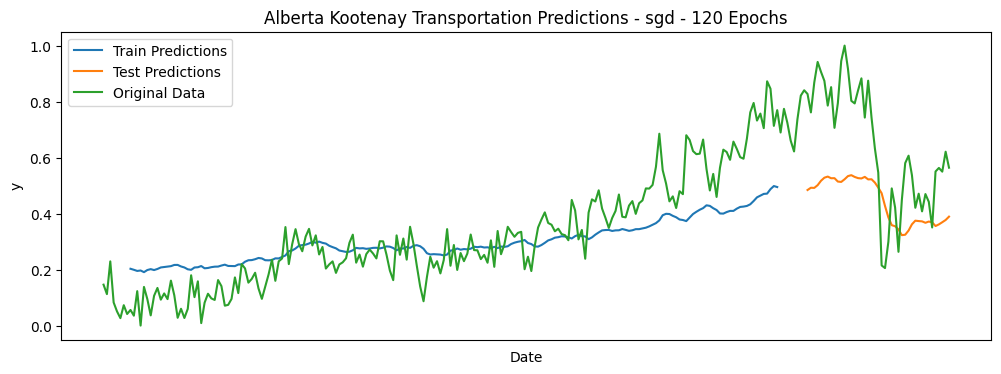

Metrics for sgd - 120 Epochs:
Train MSE: 0.04019969530025023
Test MSE: 0.09048641739999046
Train MAE: 0.09344654282270684
Test MAE: 0.2253133271612978
Train RMSE: 0.12275132210741584
Test RMSE: 0.2553657520046095


In [32]:
#Epoch applying
epochs_list = [50,80, 100, 120]
optimizers_list = ['adam','rmsprop','sgd' ]

#A new model is generated for every combination,
# and it is trained with training data (X_train and y_train) using the fit technique.

for epochs in epochs_list:
    for optimizer in optimizers_list:
        model = create_lstm_model(optimizer=optimizer)
        history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_split=0.1, verbose=0)

# The model is used to predict on both the training and testing sets after it has been trained.
# The scaler is then used to inversely translate the predictions back to the original scale.
# For visual aid purposes, the original data and the forecasts are shown together.

        train_predictions = model.predict(X_train)
        test_predictions = model.predict(X_test)

        plt.figure(figsize=(12, 4))
        plt.plot(lstm_transportation_kootenay.index[sequence_length:train_size], scaler.inverse_transform(train_predictions), label='Train Predictions')
        plt.plot(lstm_transportation_kootenay.index[train_size + sequence_length:], scaler.inverse_transform(test_predictions), label='Test Predictions')
        plt.plot(lstm_transportation_kootenay.index, lstm_transportation_kootenay['Transportation'], label='Original Data')
        plt.title(f'Alberta Kootenay Transportation Predictions - {optimizer} - {epochs} Epochs')
        plt.xlabel('Date')
        plt.ylabel('y')
        plt.legend()
        plt.show()

        train_mae = mean_absolute_error(scaler.inverse_transform(train_predictions), train['Transportation'].values[sequence_length:])
        test_mae = mean_absolute_error(scaler.inverse_transform(test_predictions), test['Transportation'].values[sequence_length:])
        
        train_rmse = np.sqrt(mean_squared_error(scaler.inverse_transform(train_predictions), train['Transportation'].values[sequence_length:]))
        test_rmse = np.sqrt(mean_squared_error(scaler.inverse_transform(test_predictions), test['Transportation'].values[sequence_length:]))
     
        train_mse = np.mean(np.square(scaler.inverse_transform(train_predictions) - train['Transportation'].values[sequence_length:]))
        test_mse = np.mean(np.square(scaler.inverse_transform(test_predictions) - test['Transportation'].values[sequence_length:]))
        print(f'Metrics for {optimizer} - {epochs} Epochs:')
        print(f'Train MSE: {train_mse}')
        print(f'Test MSE: {test_mse}')
        print(f'Train MAE: {train_mae}')
        print(f'Test MAE: {test_mae}')
        print(f'Train RMSE: {train_rmse}')
        print(f'Test RMSE: {test_rmse}')

## Pemberton Agriculture

In [33]:
lstm_agriculture_pemberton = lstm['Agriculture'][lstm['Station Name'] == 'Pemberton']

In [34]:
lstm_agriculture_pemberton.index = pd.to_datetime(lstm_agriculture_pemberton.index)

In [35]:
lstm_agriculture_pemberton = lstm_agriculture_pemberton.to_frame(name='Agriculture')

In [36]:
lstm_agriculture_pemberton['Agriculture'].head()


1970-01-01 00:00:00.000002520    12.356906
1970-01-01 00:00:00.000002521    13.155541
1970-01-01 00:00:00.000002522    12.529225
1970-01-01 00:00:00.000002523    11.522625
1970-01-01 00:00:00.000002524    12.512487
Name: Agriculture, dtype: float64

In [37]:
def create_sequences(data, sequence_length):
    sequences, labels = [], []
    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length]
        label = data[i + sequence_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)


In [38]:
sequence_length = 11
X, y = create_sequences(lstm_agriculture_pemberton['Agriculture'].values, sequence_length)

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [40]:
# Spliting the Data 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [41]:
n_steps =11
n_features =1

In [42]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [43]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

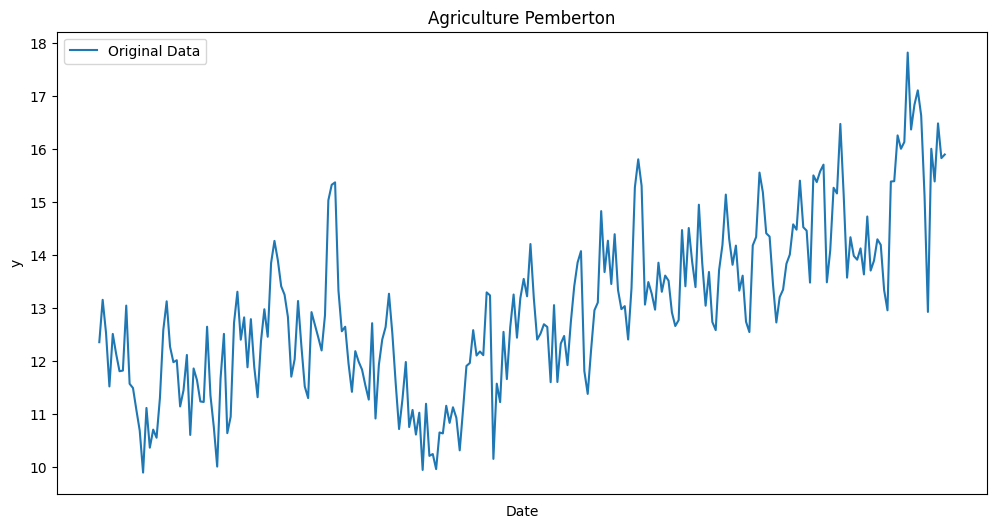

In [44]:
plt.figure(figsize=(12, 6))
plt.plot(lstm_agriculture_pemberton.index, lstm_agriculture_pemberton['Agriculture'], label='Original Data')
plt.title('Agriculture Pemberton')
plt.xlabel('Date')
plt.ylabel('y')
plt.legend()
plt.show()

In [45]:
#Scaling the data
scaler = MinMaxScaler()
lstm_agriculture_pemberton[['Agriculture']] = scaler.fit_transform(lstm_agriculture_pemberton[['Agriculture']])
#Split the data - we split the data in 80-20 which means 80 is for training and 20 is for testing
train_size = int(len(lstm_agriculture_pemberton) * 0.8)
train, test = lstm_agriculture_pemberton[:train_size], lstm_agriculture_pemberton[train_size:]

def create_sequences(data, sequence_length):
    sequences, labels = [], []
    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length]
        label = data[i + sequence_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

sequence_length = 8  # Adjust based on your data

X_train, y_train = create_sequences(train['Agriculture'].values, sequence_length)
X_test, y_test = create_sequences(test['Agriculture'].values, sequence_length)

# Reshape input for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# LSTM model creation
def create_lstm_model(optimizer='adam'):
    model = Sequential()
    model.add(LSTM(50, input_shape=(X_train.shape[1], 1)))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model


2/2 [==============================] - 0s 12ms/step


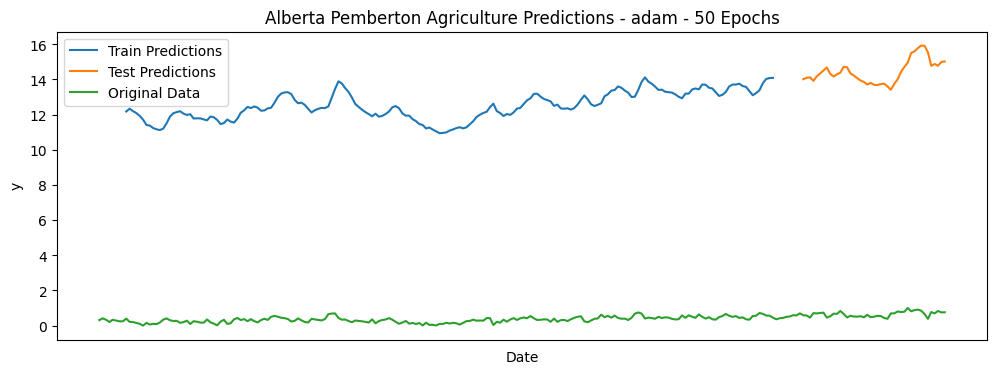

Metrics for adam - 50 Epochs:
Train MSE: 148.96216169088035
Test MSE: 190.67236506047988
Train MAE: 12.178350506004186
Test MAE: 13.791920968388771
Train RMSE: 12.197641147886442
Test RMSE: 13.804873760998193
2/2 [==============================] - 0s 0s/step


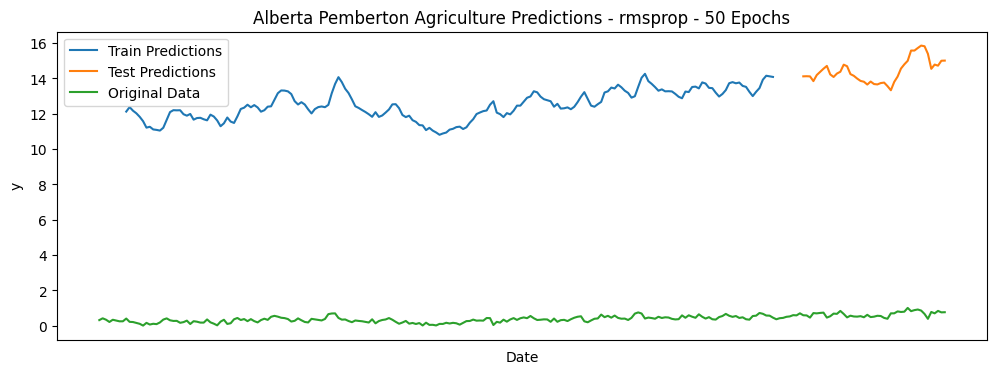

Metrics for rmsprop - 50 Epochs:
Train MSE: 148.71712317270266
Test MSE: 190.0197285825442
Train MAE: 12.166183657549736
Test MAE: 13.768528024939974
Train RMSE: 12.18704030264182
Test RMSE: 13.78106082670879
2/2 [==============================] - 0s 16ms/step


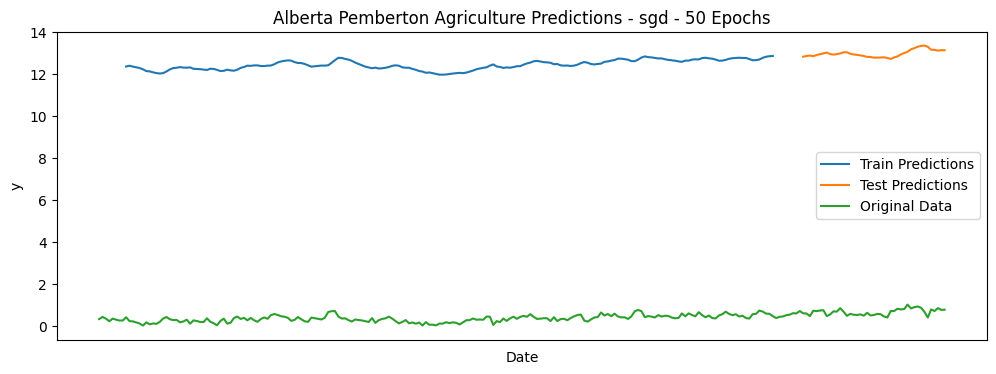

Metrics for sgd - 50 Epochs:
Train MSE: 146.34699685148487
Test MSE: 151.75572221430645
Train MAE: 12.094169204669825
Test MAE: 12.316860328009332
Train RMSE: 12.095305271035658
Test RMSE: 12.31799068475661
2/2 [==============================] - 0s 0s/step


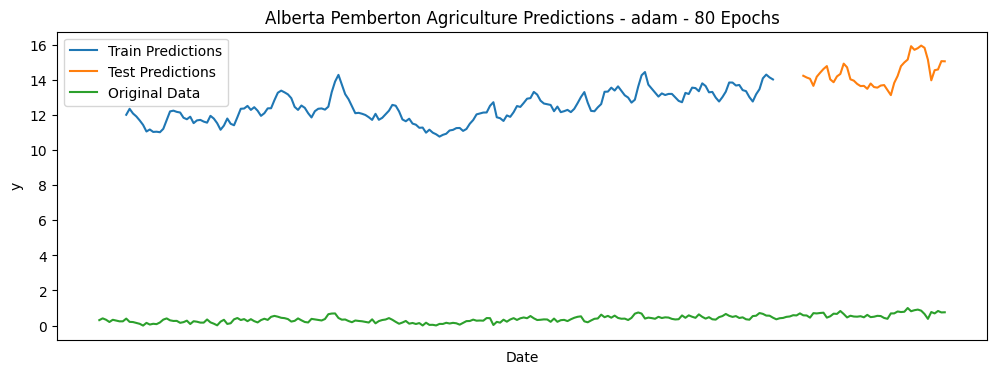

Metrics for adam - 80 Epochs:
Train MSE: 147.03051400565272
Test MSE: 188.67780977988315
Train MAE: 12.095513139316985
Test MAE: 13.715399848982715
Train RMSE: 12.117299750501028
Test RMSE: 13.731564069645994
2/2 [==============================] - 0s 18ms/step


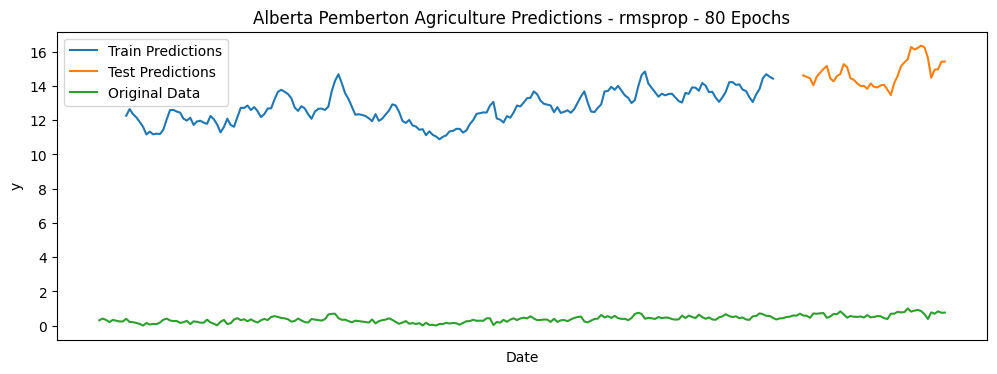

Metrics for rmsprop - 80 Epochs:
Train MSE: 154.40823448207067
Test MSE: 199.43390757246115
Train MAE: 12.39230019868585
Test MAE: 14.101398131304379
Train RMSE: 12.417379457101164
Test RMSE: 14.117765170614597
2/2 [==============================] - 0s 16ms/step


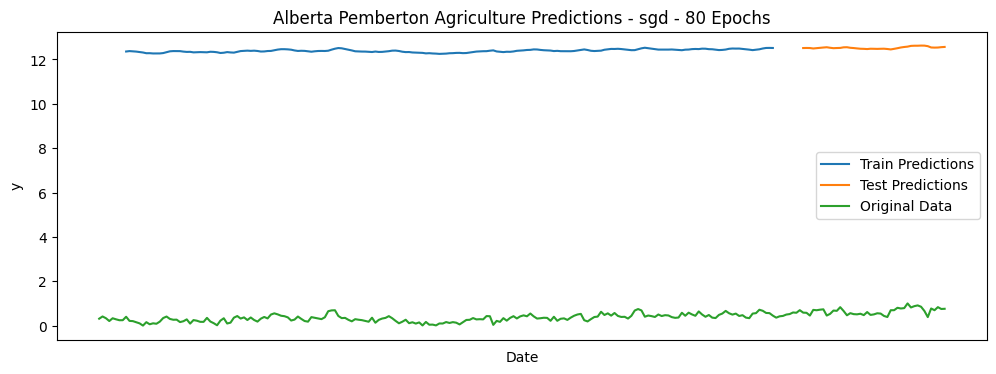

Metrics for sgd - 80 Epochs:
Train MSE: 145.42586882209744
Test MSE: 141.1748765336367
Train MAE: 12.057994687448424
Test MAE: 11.880658833215774
Train RMSE: 12.05863662965797
Test RMSE: 11.881414775402453
2/2 [==============================] - 0s 9ms/step


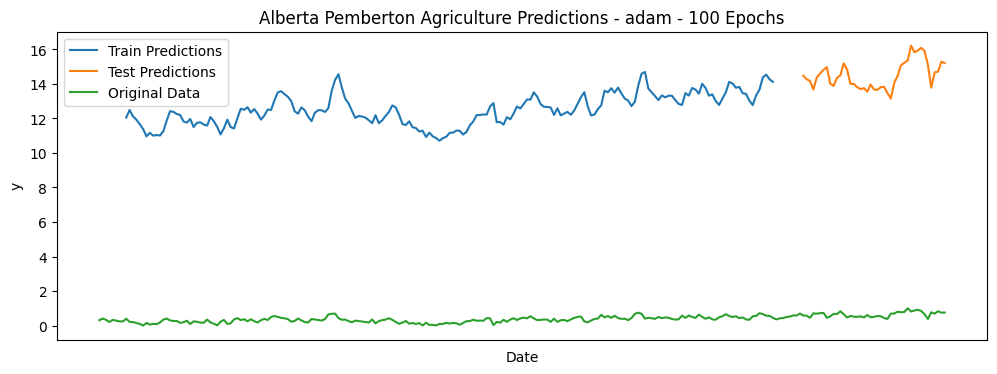

Metrics for adam - 100 Epochs:
Train MSE: 149.16248772168757
Test MSE: 192.32624254763388
Train MAE: 12.179108850031849
Test MAE: 13.845472908419602
Train RMSE: 12.204238810324947
Test RMSE: 13.863419566316448
2/2 [==============================] - 0s 16ms/step


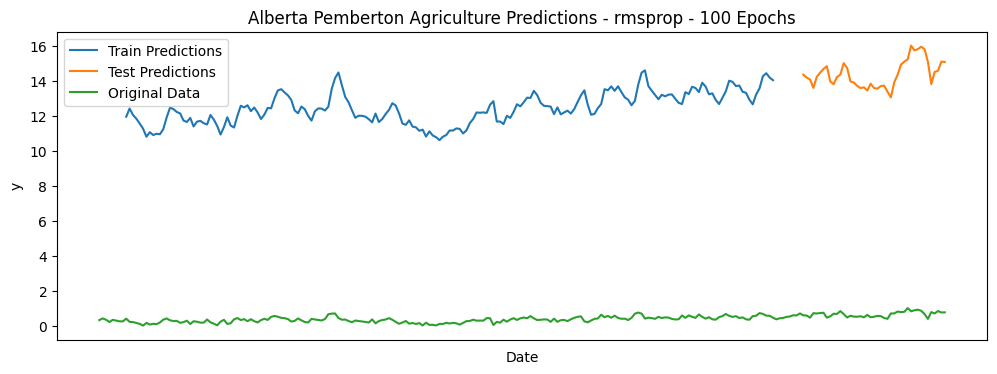

Metrics for rmsprop - 100 Epochs:
Train MSE: 147.23846650761598
Test MSE: 189.25674951770156
Train MAE: 12.100066934177825
Test MAE: 13.735074704591987
Train RMSE: 12.125199475998178
Test RMSE: 13.752425630704714
2/2 [==============================] - 0s 0s/step


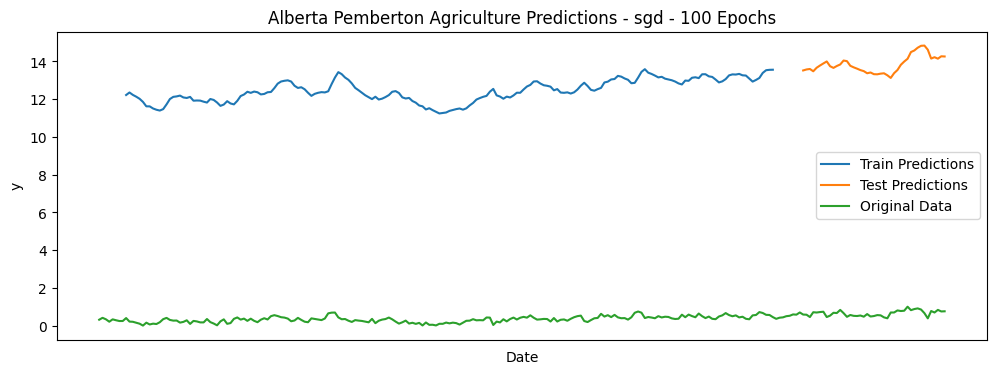

Metrics for sgd - 100 Epochs:
Train MSE: 147.07565103440092
Test MSE: 174.1046798849614
Train MAE: 12.112252529991636
Test MAE: 13.18648921208086
Train RMSE: 12.121944935303716
Test RMSE: 13.192387287352984
2/2 [==============================] - 0s 6ms/step


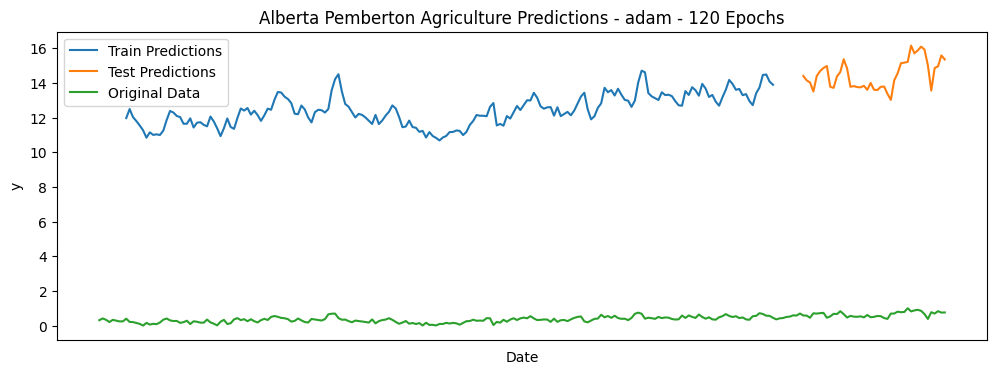

Metrics for adam - 120 Epochs:
Train MSE: 147.3584840434328
Test MSE: 191.88758190287467
Train MAE: 12.104958468103568
Test MAE: 13.827146637007617
Train RMSE: 12.12997878999571
Test RMSE: 13.847291906610952
2/2 [==============================] - 0s 21ms/step


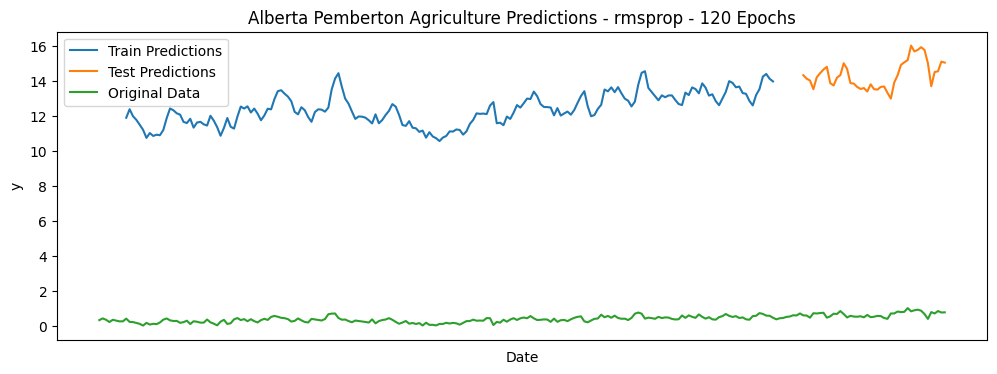

Metrics for rmsprop - 120 Epochs:
Train MSE: 145.93187587695724
Test MSE: 188.12315812313534
Train MAE: 12.04570407875082
Test MAE: 13.693045856076987
Train RMSE: 12.071134187446301
Test RMSE: 13.711039681205436


In [ ]:
#Epoch applying
epochs_list = [50,80, 100, 120]
optimizers_list = ['adam','rmsprop','sgd' ]

#A new model is generated for every combination,
# and it is trained with training data (X_train and y_train) using the fit technique.

for epochs in epochs_list:
    for optimizer in optimizers_list:
        model = create_lstm_model(optimizer=optimizer)
        history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_split=0.1, verbose=0)

# The model is used to predict on both the training and testing sets after it has been trained.
# The scaler is then used to inversely translate the predictions back to the original scale.
# For visual aid purposes, the original data and the forecasts are shown together.

        train_predictions = model.predict(X_train)
        test_predictions = model.predict(X_test)

        plt.figure(figsize=(12, 4))
        plt.plot(lstm_agriculture_pemberton.index[sequence_length:train_size], scaler.inverse_transform(train_predictions), label='Train Predictions')
        plt.plot(lstm_agriculture_pemberton.index[train_size + sequence_length:], scaler.inverse_transform(test_predictions), label='Test Predictions')
        plt.plot(lstm_agriculture_pemberton.index, lstm_agriculture_pemberton['Agriculture'], label='Original Data')
        plt.title(f'Alberta Pemberton Agriculture Predictions - {optimizer} - {epochs} Epochs')
        plt.xlabel('Date')
        plt.ylabel('y')
        plt.legend()
        plt.show()

        train_mae = mean_absolute_error(scaler.inverse_transform(train_predictions), train['Agriculture'].values[sequence_length:])
        test_mae = mean_absolute_error(scaler.inverse_transform(test_predictions), test['Agriculture'].values[sequence_length:])
        
        train_rmse = np.sqrt(mean_squared_error(scaler.inverse_transform(train_predictions), train['Agriculture'].values[sequence_length:]))
        test_rmse = np.sqrt(mean_squared_error(scaler.inverse_transform(test_predictions), test['Agriculture'].values[sequence_length:]))
     
        train_mse = np.mean(np.square(scaler.inverse_transform(train_predictions) - train['Agriculture'].values[sequence_length:]))
        test_mse = np.mean(np.square(scaler.inverse_transform(test_predictions) - test['Agriculture'].values[sequence_length:]))
        print(f'Metrics for {optimizer} - {epochs} Epochs:')
        print(f'Train MSE: {train_mse}')
        print(f'Test MSE: {test_mse}')
        print(f'Train MAE: {train_mae}')
        print(f'Test MAE: {test_mae}')
        print(f'Train RMSE: {train_rmse}')
        print(f'Test RMSE: {test_rmse}')